**Pre-processing Airbnb Review Data for NLP**

# Introduction

## Read in libraries, data, and set notebook preferences

**Read in libraries**

In [39]:
#Read in libraries
import pandas as pd
import swifter
import numpy as np


**Read in data**

In [40]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate'

#Read in data
df = pd.read_csv(path + '/2020_0131_Reviews_Cleaned.csv',sep=',',index_col=0,
                 parse_dates=['date'])

**Set preferences for notebook**

In [41]:
#Ignore warnings
import warnings; warnings.simplefilter('ignore')

#Increase number of columns and rows displayed by Pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)

## Preview data

In [42]:
#View shape and dtypes. Preview head
print('Reviews data shape:', df.shape)
print('Data types: \n', df.dtypes, '\n')
display(df.head())

Reviews data shape: (425509, 2)
Data types: 
 comments            object
date        datetime64[ns]
dtype: object 



,comments,date
19330,"Hello Josh Thank you very much for everything. I found myself very comfortable in your home. Quiet, comfortable and very complete and very clean, which I value highly. Next time I'd come with my family. I hope it's possible.",2013-12-01
143113,"Stop and book it now. Rea (Website hidden by Airbnb) this later!!! If your a single person looking for a story book San Francisco experience, look no farther. Staying in Mikes place couldn't be any more wonderful. If your familiar with ""Tales of the City"" Mike is the Olympia Dukakis. The home is warm and inviting with all the nuances of an old Victorian. Mike is an amazing host . He can tell you how walk drive or public transit the city (don't bother with a car). Would love to keep the gem to myself but everyone deserves this unique place to lay your head. Make sure while you're there be introduced to William . Book IT you won't be disappointed .",2017-06-07
1021372,"So I moved to SF in late May from Michigan to intern at Genentech for the summer. I stayed at Anjan’s apartment for 7 days while I was looking for a more permanent housing situation. Anjan was extremely hospitable and welcoming throughout the week. He was also very knowledgeable about the area and always offered to help in any way that he could. The area (SOMA) is very safe and is very “walkable.” There are plenty of restaurants and stores nearby (there’s even a target a few blocks away), so you have everything you need within a couple blocks from the apartment. As for the bedroom, it was spacious and clean. The bathroom was nice and I had to myself for the entirety of my stay. I felt very comfortable living at Anjan’s for a week and I really enjoyed staying there. If you’re a respectful person and are looking for a place to stay in SF for a short time, I highly recommend staying at Anjan’s. He’s a great person and a great host.",2013-06-02
64636,"This was the perfect home from home, our host was amazing like most California's we had a wonderful time.",2014-10-16
174143,We loved our time in beautiful SF! The place is in a fantastic location and near everything. Nadia’s communication and check in process is amazing and probably the best we have used by far. Would definitely recommend!! (Website hidden by Airbnb) Thanks for having us Nadia Jess + Mark x,2018-08-10


# Feature engineering

## Word counts

In [43]:
#Capture number of characters used in comments
df['word_count'] = [len(x.split()) for x in df['comments'].tolist()]

#Check
display(df.head())

,comments,date,word_count
19330,"Hello Josh Thank you very much for everything. I found myself very comfortable in your home. Quiet, comfortable and very complete and very clean, which I value highly. Next time I'd come with my family. I hope it's possible.",2013-12-01,39
143113,"Stop and book it now. Rea (Website hidden by Airbnb) this later!!! If your a single person looking for a story book San Francisco experience, look no farther. Staying in Mikes place couldn't be any more wonderful. If your familiar with ""Tales of the City"" Mike is the Olympia Dukakis. The home is warm and inviting with all the nuances of an old Victorian. Mike is an amazing host . He can tell you how walk drive or public transit the city (don't bother with a car). Would love to keep the gem to myself but everyone deserves this unique place to lay your head. Make sure while you're there be introduced to William . Book IT you won't be disappointed .",2017-06-07,122
1021372,"So I moved to SF in late May from Michigan to intern at Genentech for the summer. I stayed at Anjan’s apartment for 7 days while I was looking for a more permanent housing situation. Anjan was extremely hospitable and welcoming throughout the week. He was also very knowledgeable about the area and always offered to help in any way that he could. The area (SOMA) is very safe and is very “walkable.” There are plenty of restaurants and stores nearby (there’s even a target a few blocks away), so you have everything you need within a couple blocks from the apartment. As for the bedroom, it was spacious and clean. The bathroom was nice and I had to myself for the entirety of my stay. I felt very comfortable living at Anjan’s for a week and I really enjoyed staying there. If you’re a respectful person and are looking for a place to stay in SF for a short time, I highly recommend staying at Anjan’s. He’s a great person and a great host.",2013-06-02,175
64636,"This was the perfect home from home, our host was amazing like most California's we had a wonderful time.",2014-10-16,19
174143,We loved our time in beautiful SF! The place is in a fantastic location and near everything. Nadia’s communication and check in process is amazing and probably the best we have used by far. Would definitely recommend!! (Website hidden by Airbnb) Thanks for having us Nadia Jess + Mark x,2018-08-10,50


### Visualize word counts

Review word count stats:
           word_count
count  425509.000000
mean       51.012223
std        47.726691
min         1.000000
25%        20.000000
50%        38.000000
75%        67.000000
max      1002.000000


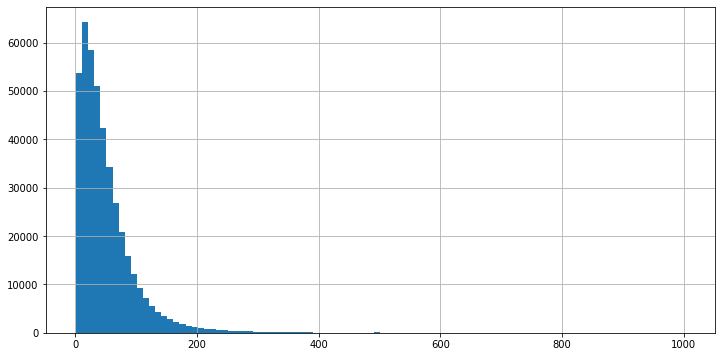

In [44]:
#View distribution of review word counts
df.word_count.hist(figsize = (12,6),
                   bins = 100)

print('Review word count stats:\n', df.describe())

Remove outliers, reviews that are too short and too long

In [45]:
#Calculate percentiles and iqr
q25, q75 = np.percentile(df['word_count'], 25), np.percentile(df['word_count'], 75)
iqr = q75 - q25

#Calculate outlier cutoffs
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

#Identify outliers
outliers = [x for x in df.word_count if x < lower or x > upper]

#Outlier stats
print('Percentiles: 25th ={}, 75th = {}, IQR = {}'.format(q25,q75, iqr))
print('Number of outliers:',len(outliers))
print('Remaining reviews:', len(df) - len(outliers))

Percentiles: 25th =20.0, 75th = 67.0, IQR = 47.0
Number of outliers: 21214
Remaining reviews: 404295


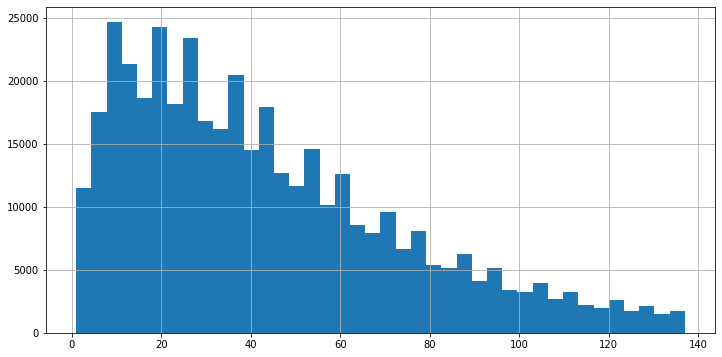

In [59]:
#Remove Reviews that are too long
df = df[(df.word_count > lower) & (df.word_count < upper)]

#View new distribution word counts
df.word_count.hist(figsize = (12,6),
                   bins = 40)

## Sentiment Analysis with Vader

Reviews data does not contain review scores associated with the review. Assigning  compound semantic score using VADER.

In [30]:
#Import and instantiate sentiment intensity analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def compound_scores(series):
    #Function to capture compound semantic score 
    score = analyzer.polarity_scores(series)['compound']
    return score

In [31]:
#Apply compound_scores to comments and assign scores to sentiment_compound
df['sentiment_compound']= df['comments'].swifter.apply(compound_scores)

## Assign postive, negative, and neutral  labels to df

In [32]:
#Function that assigns positive, negative, or neutral label depending on vader score
def labeler(vader_score):
    if vader_score > .25:
        return 'positive'
    elif vader_score < -.25:
        return 'negative'
    else:
        return 'neutral'

#Apply to df
df['label']= df.sentiment_compound.apply(labeler)

#check
display(df.head(2))

,comments,date,sentiment_compound,label
19330,"Hello Josh Thank you very much for everything. I found myself very comfortable in your home. Quiet, comfortable and very complete and very clean, which I value highly. Next time I'd come with my family. I hope it's possible.",2013-12-01,0.9534,positive
143113,"Stop and book it now. Rea (Website hidden by Airbnb) this later!!! If your a single person looking for a story book San Francisco experience, look no farther. Staying in Mikes place couldn't be any more wonderful. If your familiar with ""Tales of the City"" Mike is the Olympia Dukakis. The home is warm and inviting with all the nuances of an old Victorian. Mike is an amazing host . He can tell you how walk drive or public transit the city (don't bother with a car). Would love to keep the gem to myself but everyone deserves this unique place to lay your head. Make sure while you're there be introduced to William . Book IT you won't be disappointed .",2017-06-07,0.9334,positive


# Sample data for NLP

There is a large number of reviews, the majority of which are positive. We will take a 15% sample of all positive reviews, keep all negative reviews, and remove the neutral reviews for our NLP analysis

## Preview most positive and negative review counts

In [35]:
#How many really negative and positive reviews are there?
print("Number of positive reviews:",len(df[df.label == "positive"]))
print("Number of negative reviews:",len(df[df.label == "negative"]))

## Sample Data

In [50]:
#Sample 30% of positive reviews, we'll use all negative reviews for NLP
positive_sample = df.loc[df['label'] == "positive"].sample(frac = .30, random_state = 24, replace = False)

#Subset negative reviews
df2 = df.loc[df['label'] == 'negative']

#Concat positive_sample to df2
df2 = pd.concat((df2, positive_sample))

#Check
df2.head()

,comments,date,sentiment_compound,label,word_count
67250,"Our San Francisco stay with Sharna was very disappointing My husband has mobility problems, so I checked beforehand to find out if the stairs to her second-floor condo were steep. Sharna said no. But it turned out that her second floor condo was actually on the third floor and required my husband to climb 50 steps to get to our bedroom! Key problems: First, rang the doorbell (which didn’t work). After we banged for a while on the outside door, Sharna appeared. No smile or hello. She told us she was in the middle of a phone call and would soon come back down to help with baggage. She gave us a set of keys that didn’t work. So we went back to ringing the inoperative doorbell & banging on the door until Sharna came down again. When I told her that three different people were unable to open the door, she denied it & said no one else had ever had difficulty in using them. I asked her what to do if we couldn't open the door. Sharna’s response: “I don’t know what to tell you.” Finally I asked if she had another set of keys. She did, and this set worked. Sharna continued to argue that the doorbell did in fact work, but I gave up on arguing with her. We climbed the 50 steps, with my husband increasingly exhausted. The bed was very comfortable, but there was a dresser filled with Sharna’s things and no decent chair to sit in. Since we were booked for 7 days, I asked her for the use of a dresser. She didn’t offer to clear out the dresser but asked instead how many drawers we needed. Sharna told us that a cleaner came once a week but didn’t change the sheets. Sharna told us that she was going off –to LA, I think, and that we would have the place to ourselves. After she left, we discovered that the bed sheet and the pillowcase had reddish brown stains on them. There was no bath mat in the shower (so my husband, who has balance problems, couldn’t use it). The two tiny wastebaskets were unlined, and the carpet had dirt stains on it. If Jim and I were l0 years younger, we would have immediately made plans to move. But we were exhausted, and thought that getting a new place would take time away from our plans to meet our friends and relatives in and around the city. Sharna’s place wasn’t exactly a condo from hell – but it came close. As for Sharna, I would rate her hosting abilities as close to zero (no stars). She was unkind, indifferent, unhelpful and dishonest about the 50 stair 3rd floor condo. Esther and Jim",2013-08-02,-0.9907,negative,461
13415,"The location was great, yes it did have a great view, but it was dirty. The first thing I do anywhere is pull back the top sheet. There was a bunch of crunchy things and hair on the sheets and pillow case. The top sheet was torn in several places and the pillow cases had holes in them. They were not changed. I had no place to stay so I brushed them off and spent two uncomfortable nights in the house. The bathtub/shower was dirty and had black mold around where the wall met the tub. The sink was dirty and I mean they hadn't been cleaned in a long time. The toilet was filthy inside and out. The little plastic container to put my bathroom stuff in on the counter was gross. I would never have put my toothpaste and toothbrush in it. There is no heat in the house and it was 52 degrees at night. I went to Walgreens and purchased a small heater to use at night for the two nights I stayed there. I was offered coffee when I woke up so I went out to the kitchen and there was barely one cup left in the machine. I was the only person at the house and I guess a quarter pot to share with the owner is all you get. I was very disappointed. I would never stay there again or recommend it to anyone",2013-11-01,-0.8452,negative,241
66343,"Host was very friendly. The block where this Air BnB is, was fine, but Haight is still a bit unsavory.",2015-06-08,-0.5082,negative,20
174617,"I have stayed in many airbnb, always met host, on arrival, questions answered etc

# Write file to csv

In [51]:
#View reviews shape
print('Final reviews shape:',df2.shape)

#Set path to write processed data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Write to csv
df2.to_csv(path + '/2020_0208_Reviews_Processed_NLP.csv',sep=',', index=False)

Final reviews shape: (65049, 5)
